In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
from scipy import stats

# Data

I will be working Major League Baseball data with two specific data sets, one being all historical batting data categorized by year and player. This data includes the year, player, player's team, hits, home runs, along with most of the common (and a few less common) baseball hitting statitics. 

The second data set includes data on a teams overall season, including team name, year, ballpark(s) played at, season length, hits, ERA, runs, division among others. This data set is mostly used to determine a teams annual success via win/loss record but I will be including other stats that may come into play such as ERA.

In [4]:
# Import data
teams = pd.read_csv('teams.csv')
batting = pd.read_csv('batting.csv')

# Keep it to modern (reliable) data
teams.drop(teams[(teams.yearID < 1950)].index, inplace=True)
batting.drop(batting[(batting.yearID < 1950)].index, inplace=True)

# Calculate the variable of interest
teams.insert(7,'win_p',teams['W']/teams['G'])

# Add categorical variables before grouping
batting.insert(5, 'LgWin',teams['LgWin'])

# Batting is by player, I need it grouped by team and year.
team_batting = batting.groupby(['yearID','teamID']).sum().reset_index()

# Calculate the batting average
team_batting.insert(5, 'avg',team_batting['H']/team_batting['AB'])

# Add winning percentage and a couple other variables of interest
team_win = teams.groupby(['yearID','teamID']).sum().reset_index()
team_batting.insert(2, 'win_p',team_win['win_p'])
team_batting.insert(3, 'RA',team_win['RA'])
team_batting.insert(4, 'ERA',team_win['ERA'])
team_batting.insert(5, 'E',team_win['E'])

team_batting.insert(6,'Bases', team_batting['H'] + team_batting['2B'] +
                   team_batting['3B'] * 2 + team_batting['HR'] * 3 +
                   team_batting['SB'] + team_batting['BB'] + 
                    team_batting['HBP'])
team_batting.insert(7, 'team_g',team_win['G'])

In [5]:
team_batting.drop(['stint','AB','2B','3B','HR','CS','BB','SB','IBB','HBP','SH','SF','GIDP','H','RA'], axis=1, inplace=True)

In [6]:
team_batting

,yearID,teamID,win_p,ERA,E,Bases,team_g,G,avg,R,RBI,SO
0,1950,BOS,0.610390,4.88,111,3333.0,154,1728,0.301849,1027,974.0,580.0
1,1950,BRO,0.574194,4.28,127,3093.0,155,1823,0.272371,847,774.0,632.0
2,1950,BSN,0.532051,4.14,182,2886.0,156,1809,0.263099,785,726.0,616.0
3,1950,CHA,0.384615,4.41,135,2509.0,156,1893,0.260076,625,592.0,567.0
4,1950,CHN,0.415584,4.28,198,2655.0,154,1890,0.248184,643,615.0,767.0
5,1950,CIN,0.431373,4.32,140,2531.0,153,1811,0.260042,654,617.0,497.0
6,1950,CLE,0.593548,3.75,129,2994.0,155,1831,0.269238,806,758.0,623.0
7,1950,DET,0.605096,4.12,120,3009.0,157,1799,0.282104,837,788.0,481.0
8,1950,NY1,0.558442,3.71,137,2765.0,154,1844,0.258114,735,684.0,629.0
9,1950,NYA,0.632258,4.15,119,3121.0,155,1875,0.281850,914,860.0,458.0


## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. 

## Exploring the data: Univariate¶

In [7]:
team_batting.columns

Index(['yearID', 'teamID', 'win_p', 'ERA', 'E', 'Bases', 'team_g', 'G', 'avg',
       'R', 'RBI', 'SO'],
      dtype='object')

Variables of interest: yearID, teamID, win_p, ERA, Errors, Bases, avg, runs, RBI, SO

In [8]:
team_batting.shape

(1682, 12)

Number of data points: 1682 rows x 12 columns

Variable Types:

    TeamID - Team Name - Categorical
    
    YearID - Year - Continuous - Interval
    
    win_p - Winning Percentage - Continuous - Ratio
    
    ERA - Earned Run Average - Continuous
    
    team_g - Team Games - Continuous
    
    R - Runs (for) - Continuous - Ratio
    
    E - Errors - Continuous - Ratio
    
    avg - Batting Average - Continuous - Ratio
    
    bases - Total Bases - Continuous - Ratio
    
    RBI - Runs Batted In - Continuous - Ratio
    
    SO - Errors - Continuous - Ratio
    

In [9]:
team_batting.sort_values('win_p', axis=0, ascending=False, inplace=True)

In [10]:
team_batting.describe()

,yearID,win_p,ERA,E,Bases,team_g,G,avg,R,RBI,SO
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000
mean,1987.247325,0.499439,4.002806,121.608205,2814.629608,159.095125,2159.780618,0.258755,701.41736,660.774078,947.258621
std,18.837814,0.072653,0.581586,25.608488,289.758520,9.401823,190.012430,0.012728,97.24928,95.574023,197.780665
min,1950.000000,0.248447,2.450000,54.000000,1533.000000,103.000000,1321.000000,0.214124,329.00000,314.000000,379.000000
25%,1972.000000,0.448052,3.590000,103.000000,2658.250000,161.000000,2060.000000,0.250152,641.00000,602.250000,818.000000
50%,1989.000000,0.500000,3.970000,121.000000,2823.000000,162.000000,2197.000000,0.259242,701.00000,659.000000,934.000000
75%,2003.000000,0.552147,4.370000,139.000000,2999.000000,162.000000,2298.000000,0.267073,763.00000,720.750000,1073.000000
max,2017.000000,0.716049,6.380000,210.000000,3593.000000,165.000000,2528.000000,0.301849,1027.00000,974.000000,1571.000000


There seems to be a high variance with all but average.

## Exploring the data: Bivariate

## For two continuous variables:

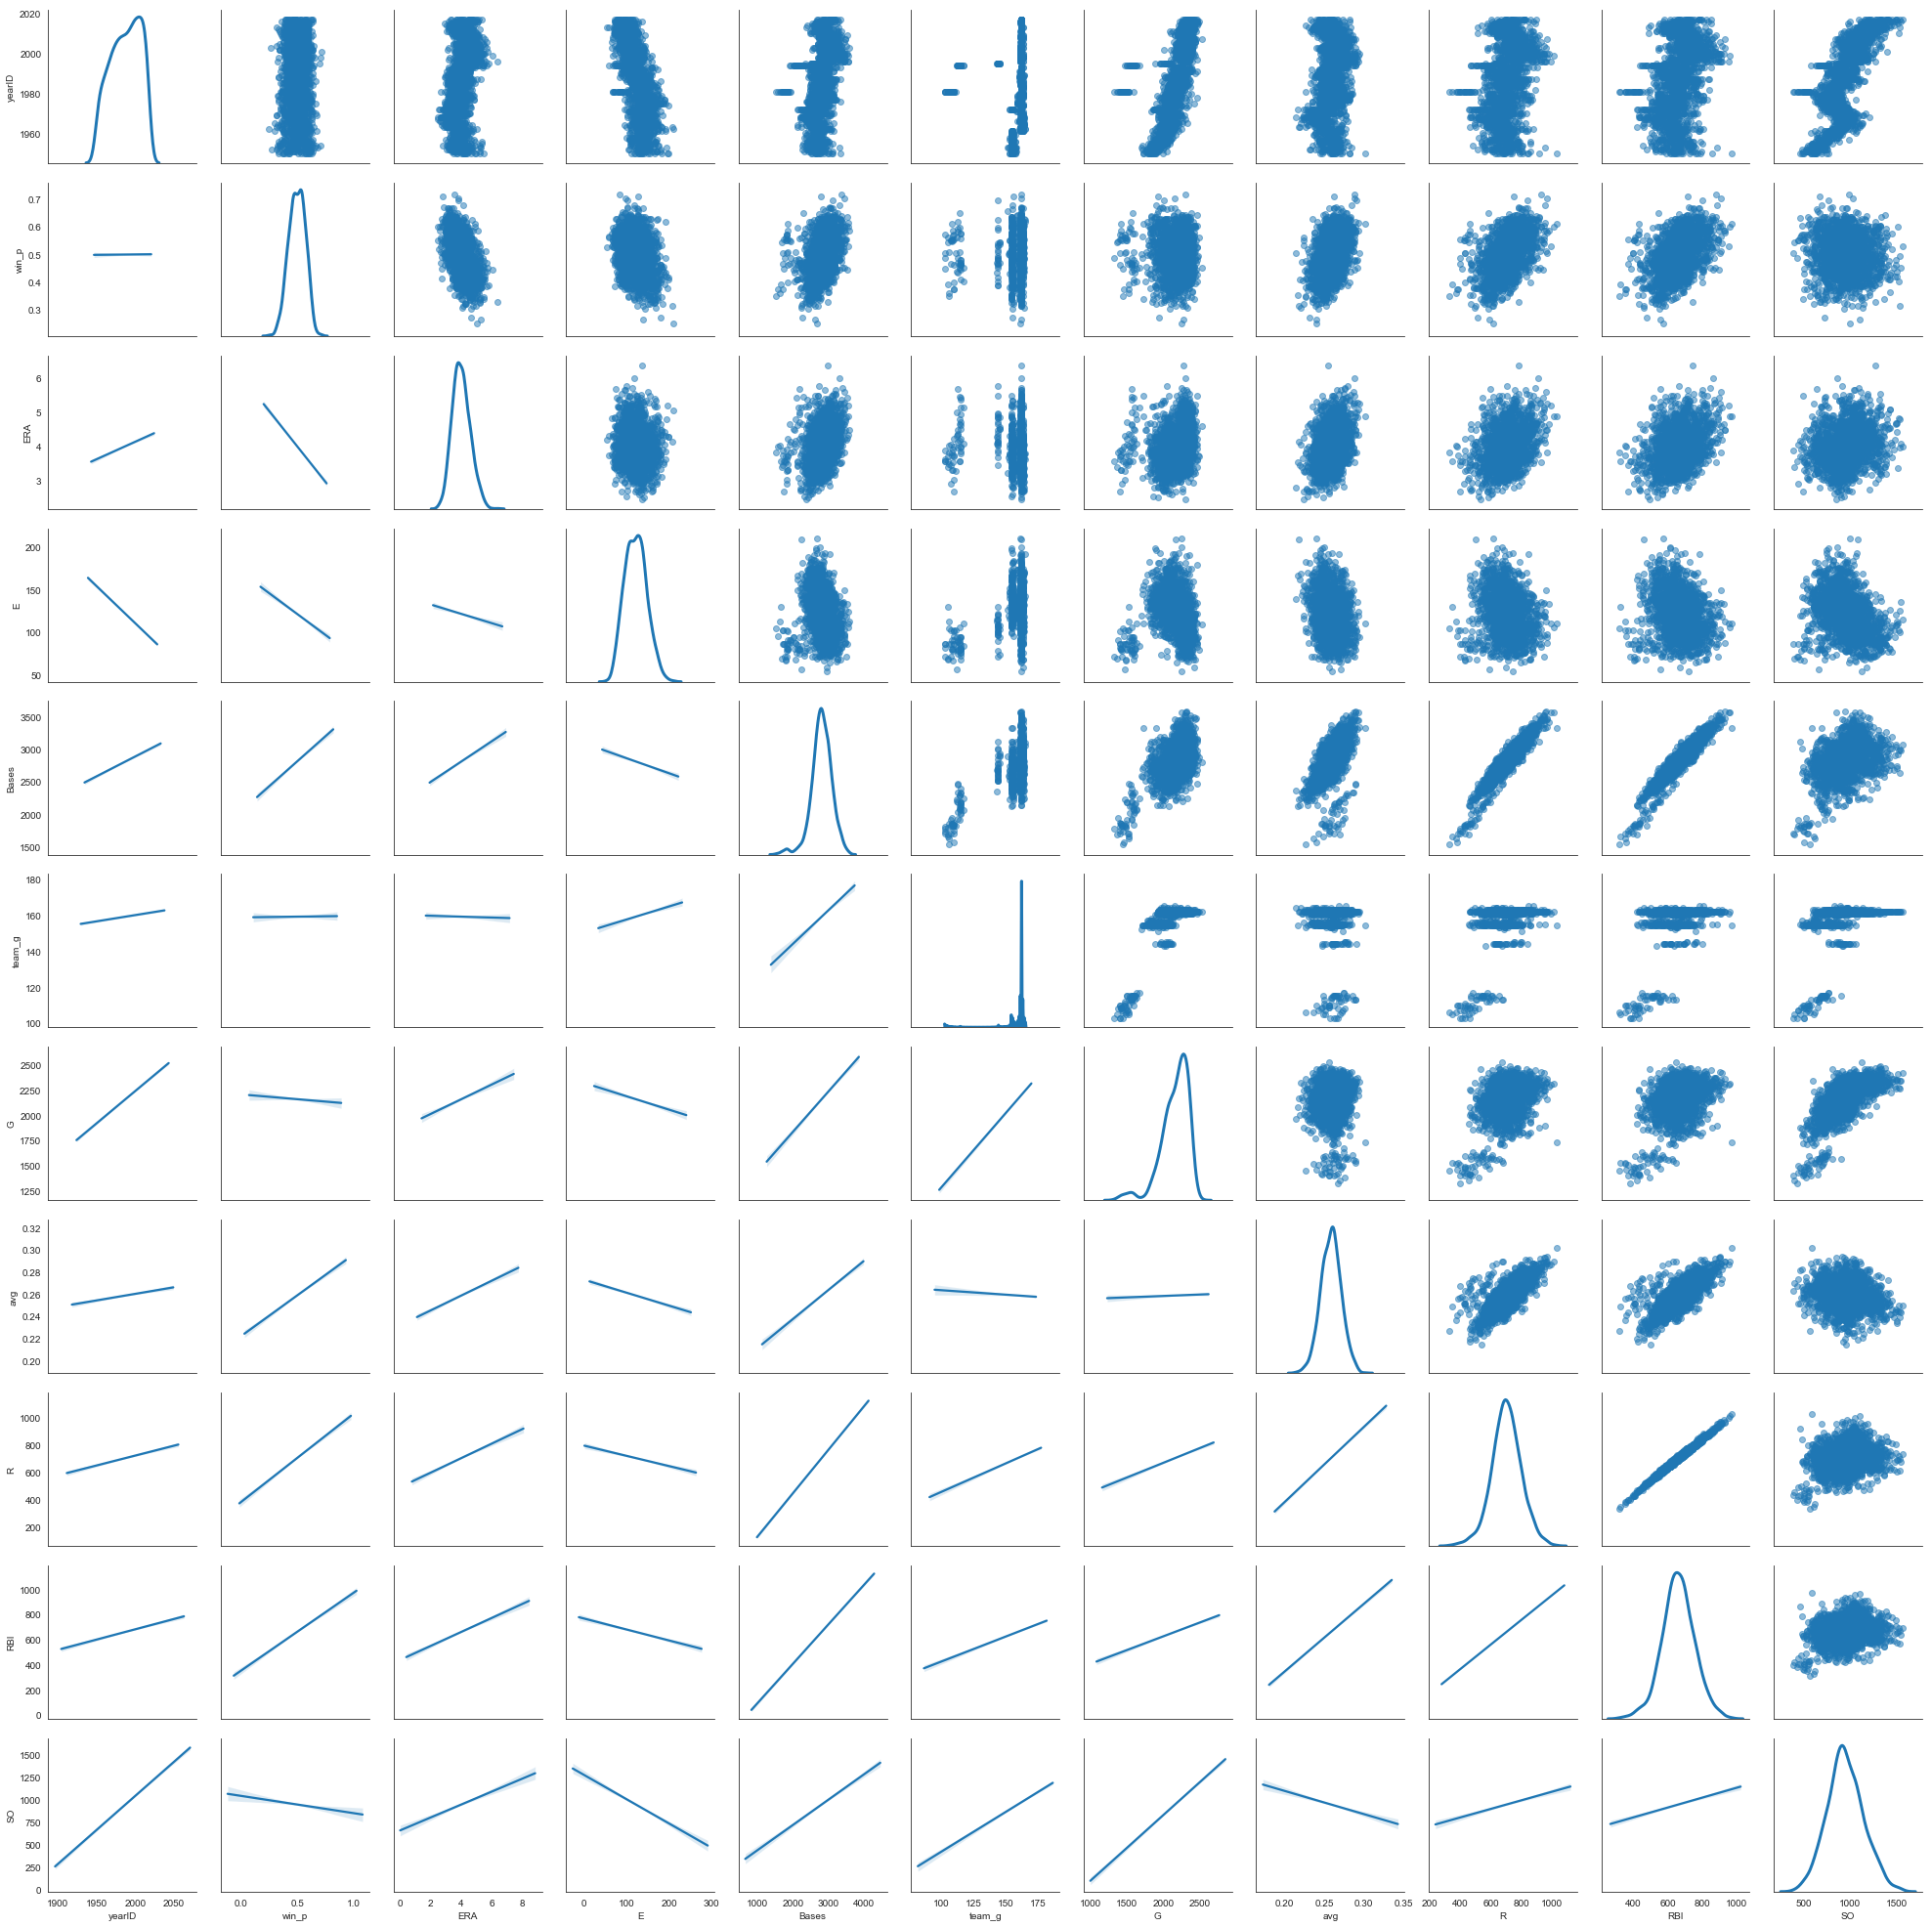

In [11]:
# Make the scatterplot matrix
# Set the default plot aesthetics.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
matrix = team_batting

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(matrix.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

#Some warnings will show up below because the plot does not include a legend.



          yearID     win_p       ERA         E     Bases    team_g         G  \
yearID  1.000000  0.008168  0.334249 -0.639452  0.398704  0.139299  0.637255   
win_p   0.008168  1.000000 -0.522273 -0.277241  0.387849  0.006304 -0.036422   
ERA     0.334249 -0.522273  1.000000 -0.124127  0.315370 -0.015428  0.224089   
E      -0.639452 -0.277241 -0.124127  1.000000 -0.204623  0.196613 -0.178955   
Bases   0.398704  0.387849  0.315370 -0.204623  1.000000  0.572124  0.607537   
team_g  0.139299  0.006304 -0.015428  0.196613  0.572124  1.000000  0.731819   
G       0.637255 -0.036422  0.224089 -0.178955  0.607537  0.731819  1.000000   
avg     0.176047  0.421986  0.307219 -0.234879  0.595356 -0.059710  0.038810   
R       0.280813  0.483679  0.318330 -0.196887  0.943071  0.404599  0.421598   
RBI     0.323025  0.471792  0.339439 -0.233154  0.946378  0.392321  0.436279   
SO      0.727932 -0.071149  0.213464 -0.351206  0.412865  0.424791  0.707488   

             avg         R       RBI   

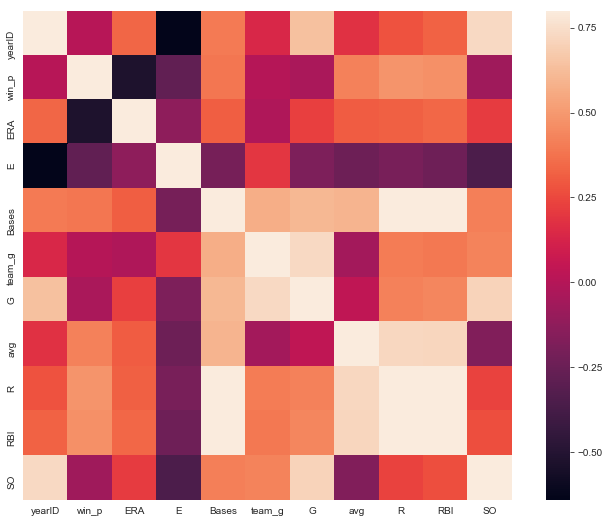

In [12]:
# Make the correlation matrix.
matrix = team_batting
corrmat = matrix.corr()

print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## For a continuous and a categorical pair

In [ ]:
data_cond = team_batting.loc[(((team_batting['yearID'] == 1950)) | (team_batting['yearID'] == 2000)),
            ['yearID','win_p','ERA','avg', 'Bases/g']]

In [ ]:
data_cond_long = data_cond
data_cond_long = pd.melt(data_cond_long, id_vars=['yearID'])

g = sns.FacetGrid(data_cond_long, col="variable", size=5, aspect=.5)
g = g.map(sns.boxplot, "yearID", "value")

plt.show()

## Create 5 new variables. Explain the reasoning behind each one

1. Calculated this one earlier with the following code:

    teams.insert(7,'win_p',teams['W']/teams['G'])

    The reasoning behind calculating winning percentage is to determine a team's success regardless of season length. If we only use wins, years with longer seasons will appear more successful than they truly were. Using winning percentage gives us success independent of season length.

2. This is another I calculated above, which is the batting average. This is a very common statistic that wasn't included in the initial data but is easily calculated. The reasoning is similar to that of winning percentage, where more hits doesn't necessarily mean a better hitting team, it could just mean there where more at bats. Dividing hits by at bats allows us to see hitting success independent of how many at bats. Code as follows:

    team_batting.insert(5, 'avg',team_batting['H']/team_batting['AB'])

3. Also added a variable called 'bases'. This was an effort to combine singles, doubles, triples, home runs, stolen bases, walks and hit by pitch. There is no variable for singles however if we use hits we know that each is a minimum of a single, therefore by adding the extra bases for the other known types of hits (1 more base for doubles, 2 more for triples and 3 more for home runs) we get the total amount of hit bases. Stolen bases, walks and hit by pitch are all equal to one base. 

    team_batting.insert(5,'Bases', team_batting['H'] + team_batting['2B'] + team_batting['3B'] * 2 + team_batting['HR'] * 3 + team_batting['SB'] + team_batting['BB'] + team_batting['HBP'])

4. The top two teams seem to have drastically different bases totals. Cleveland in 1954 is much less than Seattle in 2001. I'm curious how much of this difference is from a shorter season. I'll create a variable for bases per game, 'bases/g' to account for different season lengths.

In [13]:
team_batting.insert(6, 'Bases/g',team_batting['Bases']/team_batting['G'])

In [14]:
team_batting.head()

,yearID,teamID,win_p,ERA,E,Bases,Bases/g,team_g,G,avg,R,RBI,SO
1196,2001,SEA,0.716049,3.54,83,3380.0,1.466377,162,2305,0.288204,927,881.0,989.0
70,1954,CLE,0.711538,2.78,128,2792.0,1.448133,156,1928,0.261969,746,714.0,668.0
1100,1998,NYA,0.703704,3.82,98,3461.0,1.601573,162,2161,0.287967,965,907.0,1025.0
1005,1995,CLE,0.694444,3.83,101,3116.0,1.553340,144,2006,0.290573,840,803.0,766.0
49,1953,BRO,0.677419,4.10,118,3325.0,1.750000,155,1900,0.284571,955,887.0,686.0


5. Bases per game seems way too low, my assumpiton is we are using games from batting (which would group by player and be less reliable). I'm going to retroactively create a different column for team games - team_g, then recalculate bases/g.

In [15]:
team_batting['Bases/g'] = team_batting['Bases']/team_batting['team_g']

In [17]:
team_batting

,yearID,teamID,win_p,ERA,E,Bases,Bases/g,team_g,G,avg,R,RBI,SO
1196,2001,SEA,0.716049,3.54,83,3380.0,20.864198,162,2305,0.288204,927,881.0,989.0
70,1954,CLE,0.711538,2.78,128,2792.0,17.897436,156,1928,0.261969,746,714.0,668.0
1100,1998,NYA,0.703704,3.82,98,3461.0,21.364198,162,2161,0.287967,965,907.0,1025.0
1005,1995,CLE,0.694444,3.83,101,3116.0,21.638889,144,2006,0.290573,840,803.0,766.0
49,1953,BRO,0.677419,4.10,118,3325.0,21.451613,155,1900,0.284571,955,887.0,686.0
335,1969,BAL,0.672840,2.83,101,3041.0,18.771605,162,1983,0.265495,779,722.0,806.0
188,1961,NYA,0.668712,3.46,124,3061.0,18.779141,163,1954,0.262817,827,782.0,785.0
776,1986,NYN,0.666667,3.11,138,3009.0,18.574074,162,2103,0.263044,783,730.0,968.0
484,1975,CIN,0.666667,3.37,102,3133.0,19.339506,162,2149,0.271457,840,779.0,916.0
359,1970,BAL,0.666667,3.15,117,3069.0,18.944444,162,1990,0.256808,792,748.0,952.0


That is much better, and appears to correlate to success (at first glance). Let's check the matrix agian.

           yearID     win_p       ERA         E     Bases   Bases/g    team_g  \
yearID   1.000000  0.008168  0.334249 -0.639452  0.398704  0.387253  0.139299   
win_p    0.008168  1.000000 -0.522273 -0.277241  0.387849  0.469661  0.006304   
ERA      0.334249 -0.522273  1.000000 -0.124127  0.315370  0.396581 -0.015428   
E       -0.639452 -0.277241 -0.124127  1.000000 -0.204623 -0.385949  0.196613   
Bases    0.398704  0.387849  0.315370 -0.204623  1.000000  0.815876  0.572124   
Bases/g  0.387253  0.469661  0.396581 -0.385949  0.815876  1.000000 -0.004402   
team_g   0.139299  0.006304 -0.015428  0.196613  0.572124 -0.004402  1.000000   
G        0.637255 -0.036422  0.224089 -0.178955  0.607537  0.224954  0.731819   
avg      0.176047  0.421986  0.307219 -0.234879  0.595356  0.769458 -0.059710   
R        0.280813  0.483679  0.318330 -0.196887  0.943071  0.864608  0.404599   
RBI      0.323025  0.471792  0.339439 -0.233154  0.946378  0.876773  0.392321   
SO       0.727932 -0.071149 

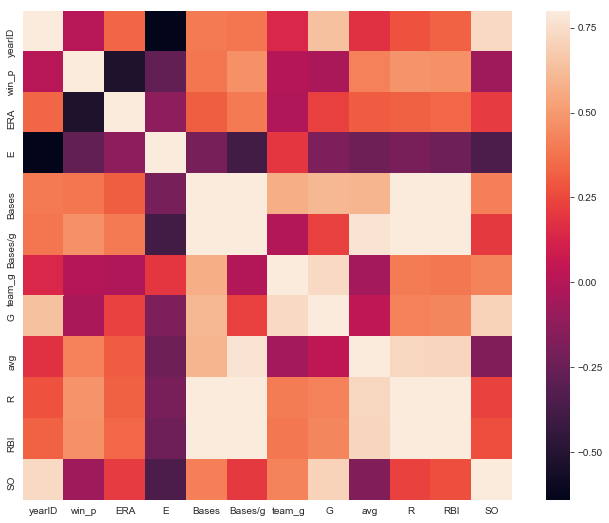

In [18]:
# Make the correlation matrix.
matrix = team_batting
corrmat = matrix.corr()

print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Bases per game with the new game value seems to be one of the highest correlating variables next to runs. ERA appears to have a very high negative correlation to winning percentage, which is to be expected.